<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Department of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Fall 2021

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 2
            	<br/>
			</font>
    <br/>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  Aban 27th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Personal Data

In [1]:
# Set your student number
student_number = 98101339
Name = 'Sayeh'
Last_Name = 'Jarollahi'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**. 
- There is one cell for your custom functions (if you need any) at the beginning of each question. Please note that this jupyter file might be broken down into 3 jupyter notebooks for easier grading, so you **must write your custom functions in the correct cell**.
- By running the cell below, you can see if your jupyter file is accepted or not. This cell will also **generate a python file which you'll have to upload to Quera** (as well as your jupyter file). The python file will later be validated and if the code in both files doesn't match, **your Practical Assignment won't be graded**.
- This assignment is due Aban 27th 23:59:59. you can use up to 10 grace days for this assignment and the hard deadline is Azar 7th 23:59:59.

In [124]:
# remember to save your jupyter file before running this script
from Helper_codes.validator import *

python_code = extract_python("./questions.ipynb")
with open(f'python_code_{student_number}.py', 'w') as file:
    file.write(python_code)

23 33
your jupyter file won't be graded. You may have added some cells or edited the metadata.


# Q1 (30 Points + 5 Extra Points)

<font size=4>
Author: Reza Amini
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

## Libraries

In [3]:
import numpy as np
from typing import Tuple
from matplotlib import pyplot as plt

<div>
	<font size=3>
        <hr/>
            In this part of the question, we want to implement the functions and draw diagrams and discuss about the convexity of functions
           <hr/>
    </font>
</div>

## Functions

a)
$f_1(x) = \frac{x^2 cos(\frac{x}{10}) - x}{100} \quad $ where $\quad x \in [80, 110]$
<br/>
b)
$f_2(x) = \log (\sqrt{sin \frac{x}{20}}) \quad $ where $\quad x \in [1, 60]$
<br/>
c)
$f_3(x) = \log (\cos(x) + \frac{45}{x}) \quad $ where $\quad x \in [1, 45]$

<div>
    <font size=3>
In the first step, implement the functions.
     </font>
</div>

In [4]:
def f_1(x):
    return ((x**2)*np.cos(x/10) - x)/100

In [5]:
def f_2(x):
    return np.log(np.sqrt(np.sin(x/20)))

In [6]:
def f_3(x):
    return np.log(np.cos(x)+(45/x))

<div>
    <font size=3>
    Now implement a function to plot the mathematical functions
     </font>
</div>

In [7]:
def draw(func, x_range):
    yvals = func(x_range)
    plt.plot(x_range, yvals)
    

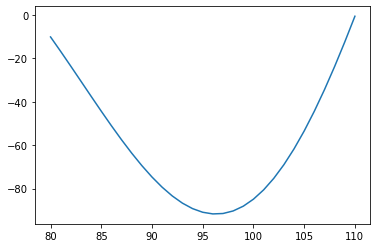

In [8]:
draw(f_1, np.arange(80, 110 + 1))

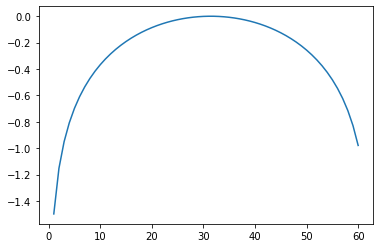

In [9]:
draw(f_2, np.arange(1, 60 + 1))

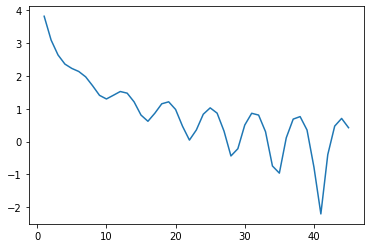

In [10]:
draw(f_3, np.arange(1, 45 + 1))

<div>
    <font size=3>
    Discuss the Convexity of each function according to the diagrams
     </font>
</div>

<font color=blue size=3>
The first function is convex in the given range.Also it is obvious that the function is not convex in R. According to the diagram, it has only one local minimum that is the global minimum too. <br>
the second function is concave in the given range. The function has only one local maximum that is the global maximum too. <br>
The third function is not convex nor concave. It has many local minimum and maximums. The second derivation of the function is sometimes positive and sometimes negative, and this is another proof for the answer. 
</font>

<div>
    <font size=3>
what method do you suggest to find the maximum in the second function?
     </font>
</div>

<font color=blue size = 3>
    (3 Points) <br/>
The maximum in the second function can be found by using Gradiant Descent Algorithm. Instead of finding the maximum for f_2 function, we can find minimum for -f_2 function. It is obvious that these two values are the same. <br>
First we choose a random number between 1 and 60, then we use the gradiant function(f_2') to get closer to the local minimum of -f_2. If learning rate is chosen properly, the answer will converge to local minimum (that is equal to global minimum) in countable steps. <br>
The formula for finding the next x value:<br>
x_2 = x_1 - a(-f_2)' = x_1 + af_2'
</font>

<div>
    <font size=3>
        <hr/>
        <ul>
            In this part, we want to obtain a minimum of one of the above functions with the gradiant descent algorithm
        </ul>  
        <hr/>
    </font>
</div>

## Gradiant descent

<div>
    <font size=3>
    Complete gradiant descent function and calculate the minimum of function (a).
     </font>
</div>

In [11]:
def calculate_derivation(func, value):
    h = 1E-11
    return (func(value+h)-func(value))/h
def gradiant_descent(func, initial_point: float, learning_rate: float, max_iterations: int):
    result_point = initial_point
    for i in range(max_iterations):
        result_point = initial_point - learning_rate* calculate_derivation(func, initial_point)
        if initial_point == result_point:
            break
        initial_point = result_point
    return result_point

In [12]:
gradiant_descent(
    func=f_1, 
    initial_point=np.random.uniform(80, 110), 
    learning_rate=0.05, 
    max_iterations=1000
)

96.30114029545621

<div>
    <font size=3>
In the last part, we want to investigate the effect of the learning rate hyperparameter on the gradiant descent algorithm with a new function     
    </font>
</div>

## Function

$f(x_1, x_2) = 2x_1^2 + 3x_2^2 - 4x_1x_2 - 50x + 6y$

In [13]:
def f(x_1, x_2):
    return 2*(x_1**2)+3*(x_2**2)-4*x_1*x_2 -50*x_1+6*x_2

<div>
    <font size=3>
Implement gradiant descent function for two-dimensional functions, in such a way that it gives sequence of x_1 and x_2 in the output ()
    </font>
</div>

In [14]:

def gradiant_descent(func, initial_point: Tuple, learning_rate: float, threshold: float, max_iterations: int):
    x_1_sequence = [initial_point[0]]
    x_2_sequence = [initial_point[1]]
    for i in range(max_iterations):
        current_x1 = x_1_sequence[-1]
        x_1, x_2 = update_points(func,x_1_sequence[-1], x_2_sequence[-1], learning_rate)
        x_1_sequence.append(x_1)
        x_2_sequence.append(x_2)
        if x_1>threshold or x_2>threshold:
            break
    return x_1_sequence, x_2_sequence

def update_points(func, x_1, x_2, learning_rate):
    h = 1E-11
    x1_derivation = (func(x_1+h, x_2) - func(x_1, x_2))/h
    x2_derivation = (func(x_1, x_2+h) - func(x_1, x_2))/h
    return (x_1-learning_rate*x1_derivation, x_2-learning_rate*x2_derivation)

In [15]:
def draw_points_sequence(func, x_1_sequence, x_2_sequence):
    X1, X2 = np.meshgrid(np.linspace(-100.0, 100.0, 100), np.linspace(-100.0, 100.0, 100))
    Y = func(X1, X2)
    cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
    plt.clabel(cp, inline=1, fontsize=10)
    cp = plt.contourf(X1, X2, Y, )
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.scatter(x_1_sequence, x_2_sequence, s=10, c="y")
    plt.show()

<div>
    <font size=3>
    Run the gradiant descent algorithm for each of the learning rate values and use the above function to draw diagram
    </font>
</div>

In [16]:
initial_point = (-100, 100)
learning_rates = [0.01, 0.05, 0.19, 0.4]
threshold = 100
max_iterations = 1000

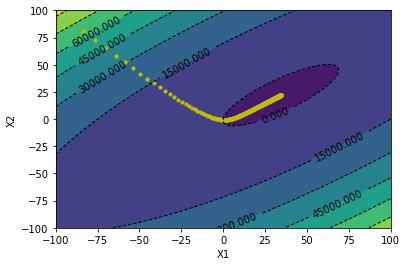

In [17]:
draw_points_sequence(f, *gradiant_descent(f, initial_point, learning_rates[0], threshold, max_iterations))
# learning rate 0.01                                

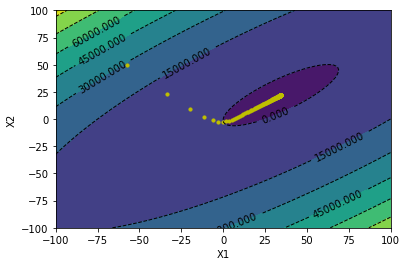

In [18]:
draw_points_sequence(f, *gradiant_descent(f, initial_point, learning_rates[1], threshold, max_iterations))
# learning rate 0.05

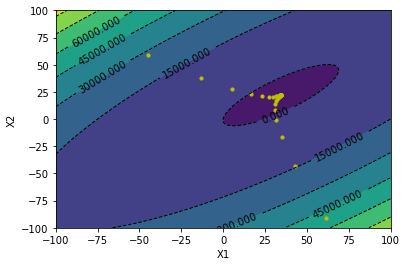

In [19]:
draw_points_sequence(f, *gradiant_descent(f, initial_point, learning_rates[2], threshold, max_iterations))
# learning rate 0.19

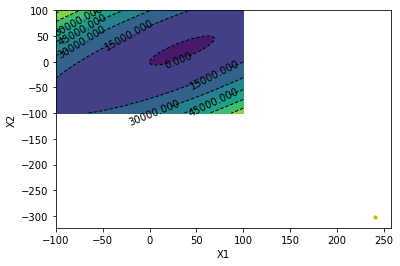

In [20]:
# learning rate 0.4
draw_points_sequence(f, *gradiant_descent(f, initial_point, learning_rates[3],threshold, max_iterations))

<div>
    <font size=3>
    explain your result comprehensively from the charts, 
    </font>
</div>

<font color=blue size=3>
    As we can see, learning rates are in ascending order.We know that if learning rate is too small, converging to the minimum point is slow and it takes many steps to get to the minimum point. On the other hand, if learning rate is not chosen acurate and it is too big, algorithm will not converge to the minimum and it will get farther from the minimum as the alrgorithm is running.<br>
    when learning rate is 0.01, number of steps in the way of converging to the minimum is more than number of steps when learning rate is 0.05 . However finally by using both of the learning rates, the answer will converge to the minimum. 
    <br> When learning rate is 0.19, at first the distance between two consecutive step is big. but as time passes, this distance gets smaller and finally the anwer will converge to loval minimum. The steps that are taken in this learning rate are much smaller from the two previous times that algorithm was executed. 
    <br>
    According to the last chart, when learning rate is 0.4, the answer doesnt converge to minimum. This learning rate is not acurate for this problem and it is too large. 
    <br>
    Overall, the number of steps that are taken before converging to the minimum for these four learning rates are: 
        <br> 
    learning_rate[0]>learning_rate[1]>learning_rate[2]
    <br>
    the algorithm is more optimal (according to time) when the learning rate is larger (in cases that the result converges to the minimum obviously!)
    <br>
    <br>
    NOTE: I tried different leaning rates with two digits in the fraction and the maximum learning rate that converges to the minimum is 0.21!
    
</font>

# Q2. CSPs (30 Points)

<font size=4>
     Author: Alireza Tajmirriahi
     <br/>
     <font color=red>
     Please run all the cells.
     </font>
</font>
<br/>

As students are preparing for midterm exams and the virtual exam days are gone and forgotten, each department is struggling to select at least one hall out of $N$ halls in the university to hold their exams. But here's the thing:
  - Students from each department aren't really fond of sitting next to students from other departments and must be separated (for example CE students and CS students must not share the same hall for exams).
  - Each department likes certain halls and won't hold their exams in other halls.
  - Sadly, the exit doors in some of the halls are stuck and the hard working staff have provided some routes so that the students from specific halls need to walk through the other hall and exit after the examination. And because they would like to prevent cheating as much as possible, students in such halls cannot be from the same department.
Check out the example below to fully understand the situation.

## Example
Look at this picture carefully.<br>
<img src="Images/CSP_example.png" width="400"/>
  - There are $6$ halls and $3$ departments.
  - The halls which the deparments like are indicated (for example, CE exams can be held only at Hall 1, 4 and 6).
  - Students from Hall 1 should exit using the doors in Hall 2 (Note: they all exit there and won't continue to Hall 3). In this case, EE students cannot be in both Hall 1 and 2 (But of course, it's okay for them to be in Hall 1 and 3).

## Note
  - You _must_ implement and use AC-3 algorithm.
  - You will _probably_ need to utilize the heuristic algorithms you have learned (e.g. MRV and LCV) or consider nearly tree-structured graphs approach in order to pass all tests in an appropriate time.

## Input
  - The first line consists of $N$ (count of halls) and $M$ (count of departments).
  - In the following $M$ lines, the $i$ th line ($1 \le i \le M$) is a list of preferred halls for the $i$ th department (separated by space).
  - In the next line, $E$, the total number of exit constraints (edges in the previous graph) are given.
  - in each of the following $E$ lines, a pair of hall numbers (separated by space) is given (reminder: the direction is important).
$$1 \le N \le 50$$
$$1 \le M \le 50$$

### Sample Input
This sample describes the previous example (CE=1, EE=2, ME=3).
```
6 3
1 4 6
1 2 3 5 6
3 4 5
5
1 2
2 3
3 4
3 5
3 6
```

## Output
In the only line, print:
  - list of one appropriate assignment ordered by hall number (separated by space).
  - `NO` if there isn't.

### Sample Output
One possible solution to the example above is {Hall1=CE, Hall2=EE , Hall3=ME, Hall4=CE, Hall5=EE, Hall6=EE}. So:
```
1 2 3 1 2 2
```
In another example, If Hall3 was not an option for ME, then the answer would be:
```
NO
```
Because then hall 2 or 3 would be empty.

## Your code
**Note:** It's OK to change the signature for the given functions and the given structure is just a suggestion to help you with the implementation. (you can't remove or add any cells based on the **Rules** section)

In [21]:
def create_queue(var, value, neighbors):
    queue = []
    if var ==None:
        for node, node_neighbors in neighbors:
            for neighbor in node_neighbors:
                queue.append((neighbor, node))
        return queue
    for neighbor in neighbors[var]:
        queue.append((neighbor, var))
    return queue

def remove_node_value(var, value, valid_values, removed_values):
    if var in removed_values:
        removed_values[var].append(value)
    else:
        removed_values.update({var:[value,]})
    valid_values[var].remove(value)
        
def retract_removals(removed_values:dict, valid_values:dict):
    for node, values in removed_values.items():
        valid_values[node].extend(values)
        
    

In [22]:
# valid_values is dict of nodes and unary constraints
# neighbors is binary constraints that two nodes cannot have the same value
def ac_3(neighbors, valid_values, removed_values={}, var =None, value=None):
    queue = create_queue(var, value, neighbors)
    while len(queue)!=0:
        x,y = queue.pop(0)
        if revise(neighbors, removed_values, valid_values, x, y):
            if len(valid_values[x]) == 0:
                return False
            for neighbor in neighbors[x]:
                if neighbor != y:
                    queue.append((neighbor, x))
    return True
    
    #################################################################
    # (Point: 30% of total score obtained by tests)                 #
    # This function returns false                                   #
    # if an inconsistency is found and true otherwise.              #
    # Feel free to also implement a `revise` function in this cell. #
    #################################################################


def revise(nieghbors, removed_values:dict, valid_values, x_i, x_j):
    revised = False
    for value in valid_values[x_i]:
        value_found = False
        for j_value in valid_values[x_j]:
            if j_value!=value:
                value_found = True
                break
        if not value_found:
            
            revised = True
            remove_node_value(x_i, value, valid_values, removed_values)
    return revised
    

In [23]:
def backtrack(assignments, valid_values, neighbors):
    if len(assignments) == len(valid_values):
        return assignments
    current_node = get_minimum_remaining_value(valid_values, neighbors, assignments) 
    for value in order_values(valid_values, current_node, neighbors):
        removed_values = {}
        for other_value in valid_values[current_node][:]:
            if other_value != value:
                remove_node_value(current_node, other_value, valid_values, removed_values)
        if ac_3(neighbors, valid_values, removed_values, current_node, value):
            assignments.update({current_node:value})
            result = backtrack(assignments, valid_values, neighbors)
            if result != False:
                return result
            assignments.pop(current_node)
            retract_removals(removed_values, valid_values)
    return False
        
    #################################################################
    # (Point: 60% of total score obtained by tests)                 #
    # This function returns a solution if there is a complete       #
    # assignment or failure if there is not                         #
    #################################################################
    

def backtracking_search(valid_values, neighbors):
    result = backtrack({}, valid_values, neighbors)
    if not result:
        return 'NO'
    result_number =[]
    for i in range(1,len(result)+1):
        result_number.append(result[i])
    return ' '.join(str(item) for item in result_number)
        

def get_minimum_remaining_value(valid_values, neighbors, assignments):
    minimum_remaining_value = []
    remaining_value_count = float('inf')
    for node, values in valid_values.items():
        if node in assignments:
            continue
        if len(values)< remaining_value_count:
            minimum_remaining_value = [node,]
            remaining_value_count = len(values)
        elif len(values) == remaining_value_count:
            minimum_remaining_value.append(node)   
    if len(minimum_remaining_value)>1:
        max_constraint_node = minimum_remaining_value[0]
        for node in minimum_remaining_value:
            if len(neighbors[node])> len(neighbors[max_constraint_node]):
                max_constraint_node = node
        return max_constraint_node
    return minimum_remaining_value[0]

def order_values(valid_values, var, neighbors):
    def get_constraint_rule_out_count(value_var):
        violence_count = 0
        for neighbor in neighbors[var]:
            if value_var in valid_values[var]:
                violence_count = violence_count + 1
        return violence_count
    return sorted(valid_values[var],key=get_constraint_rule_out_count)
    
    
    

In [24]:
import Helper_codes.question2 as q2
import time

TIME_LIMIT = 3

tests = q2.get_all_tests(prefix='q2_')
tests_passed = 0
for test in tests:
    n, m, m_next_lines, e, next_e_lines = q2.scan_test_input(test)
    neighbors = {}
    valid_values = {}
    for i in range(1,n+1):
        neighbors.update({i:[]})
        valid_values.update({i:[]})
    for i in range(1,len(m_next_lines)+1):
        for x in m_next_lines[i-1]:
            valid_values[x].append(i)    
    for i, j in next_e_lines:
        neighbors[i].append(j)
        neighbors[j].append(i)
    start_time = time.time()
    result = backtracking_search(valid_values, neighbors)
    total_time = time.time() - start_time
    if q2.is_result_valid(test, result) and total_time < TIME_LIMIT:
        tests_passed += 1
    else:
        print(f'test {test} failed. time elapsed= {total_time}')
print(f'Score = {tests_passed / len(tests) * 100}%')

Score = 100.0%


# Q3 (30+5 Points)

<font size=4>
Author: Matina mehdizadeh
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

Consider the given 8*8 board game. There are two players in this game and they try to block each other and limit their valid moves by making walls. Their moves are limited to the 8 cells (or less when they are around the edges) beside them and the walls will start to appear only when a player steps into a random generated yellow cell and the wall will continue to be built until the player reaches the next yellow cell. The players start the game at (0,0) and (7,7) and they keep playing untill one of them loses. There are multiple ways for a player to win the match:
- If a player steps into a wall or out of the board, the player loses the match and "invalid move" massege will appear on terminal.
- If the players reach the maximum moves the game finishes and the winner would be chosen based on the maximum valid move they have left plus the number of walls they have made and "No more moves" massege will appear on terminal.
- If the getMove() function does not return any value after 2 seconds, the player loses the match and "Time limit exceeded" massege will appear on terminal.
<img src="Images/Q3.png" style="float: center; margin-left: 250px; margin-top: 50px; width:500px;height:400px;"/>

In this question, the codes for starting the game were provided for you in Helper-codes folder. You are expected to implement the MinimaxPlayer class (which inherit the Player class) with alpha-beta pruning. (25 points)

## Libraries

In [71]:
!pip install tk
!pip install matplotlib
import numpy as np
import random
from Helper_codes.graphics import *
from Helper_codes.question3 import Cell
from Helper_codes.question3 import IntPair
from Helper_codes.question3 import Player
from Helper_codes.question3 import NaivePlayer
from Helper_codes.question3 import Board
from Helper_codes.question3 import Game
import time
import matplotlib as plt

**The following implementations are suggestional and you may change them if you desire.
The move_ functions' purpose is to find out if a player, has a valid move on that direction.
the purpose of checkRow and CheckCole are to check if the player's x and y is still in the board.**


In [120]:
import random
class MinimaxPlayer(Player):
    
    def __init__(self, col, x, y, depth):
        super().__init__(col, x, y)
        self.depth = depth

    def can_move(self, x, y, board, player):
        other_player = [i for i in board.players if x!=player][0]
        if x>=8 or y>=8:
            return False
        elif x<0 or y<0:
            return False
        if board.getCell(x,y).getColor() != 0 :
            return False
        elif x==other_player.getX() and y==other_player.getY():
            return False
        elif x==player.getX() and y==player.getY():
            return False
        return True
        
    def canMove(self, x,y, board):
        return len(self.get_probable_moves(board, self))!=0
        
    
    def get_probable_moves(self, board, player ):
        initial_x = player.getX()
        initial_y = player.getY()
        movable_locations = []
        for i in range(-1,2):
            for j in range(-1,2):
                x = initial_x-i
                y = initial_y-j
                if self.can_move(x, y, board, player):
                    movable_locations.append(IntPair(x, y))
        random.shuffle(movable_locations)
        return movable_locations        

    def minValue(self, board, alpha, beta, depth=0):
        the_player = [x for x in board.players if x!=self][0]
        optimal_choice = IntPair(0,0)
        if depth==self.depth or board.getNumberOfMoves()==80 :
            return board.getScore(self.getCol()) - board.getScore(the_player.getCol()), None
        elif len(self.get_probable_moves(board, the_player)) ==0:
            return -100, None
        v = float('inf')
        for a in self.get_probable_moves(board, the_player):
            copy_board = Board(board)
            board.move(a, the_player.getCol())
            v = min(v, self.maxValue(board,alpha, beta, depth+1 )[0])
            board = copy_board
            if v<= beta:
                return v, a
            beta = min(beta, v)
        return v, a
    
    def maxValue(self, board, alpha, beta, depth=0):
        other_player = [x for x in board.players if x!=self][0]
        if depth==self.depth or board.getNumberOfMoves()==80 :
            return (board.getScore(self.getCol()) - board.getScore(other_player.getCol())), IntPair(self.getX(),self.getY())
        elif len(self.get_probable_moves(board, self)) ==0:
            return -100, IntPair(0,0)
        v = float('-inf')
        for a in self.get_probable_moves(board, self):
            optimal_choice = a
            copy_board = Board(board)
            board.move(a, self.getCol())
            v = max(v, self.minValue(board,alpha, beta, depth+1 )[0])
            board = copy_board
            if v>= beta:
                return v, a
            alpha = max(alpha, v)
        return v, a
    
    def getMove(self, board):
        ################################################################
        # implement a function that returns an Inpair for player's-    #
        # next x and y. Implementation of x and y should be in a way-  #
        # that let the players choose any of the 8 cells around them   #
        # (unlike the NaivePlayer which can go only in 4 direction)    #                                          
        # pay attention that this IntPair should be calculated using   #
        # alpha beta pruning Otherwise, you will not receive the full  #
        # score (15 points)                                            #
        ################################################################
        alpha = float('-inf')
        beta = float('inf')
        next = IntPair(-20, -20)

        if (board.getNumberOfMoves() == board.maxNumberOfMoves):
            return IntPair(-20, -20)
        
        if not (self.canMove(board.getPlayerX(self.getCol()), board.getPlayerY(self.getCol()), board)):
            return IntPair(-10, -10)
        
        v, next = self.maxValue(board, alpha , beta, 0)
        return next
        
        

If you run the game once (numberOfMatches = 1) the game window will open and you would be able to observe the players behaviour and the reason why the winner has won, will appear on terminal.
If you run the game for more than one match (numberOfMatches > 1) the graphic window and the comments on terminal would not show up. This is for the time you finish implementing the MinimaxPlayer class and you want to verify the functionality of your code; also, for next part of the question, in which you should plot the scores for the first player.

In [98]:
################################################################
# p1 must be replace with minimaxPlayer                        #
################################################################
p1 = MinimaxPlayer(1, 0, 0, 4)
p2 = NaivePlayer(2, 7, 7)
g = Game(p1, p2)
numberOfMatches = 1
score1, score2 = g.start(numberOfMatches)
print(score1/numberOfMatches)

Player 1 has made an invalid move
Player 2 has won

0.0


In this section, you need to run the game code multiple times and each time with the same numberOfMatches (this should be a large number so your answer be more reliable) once for Naive player and once for Minimax. compare these two plots in terms of shape and the main elements of the distribution. (5 points)
<bold>
    pay attention to the comment of second cell please!
</bold>

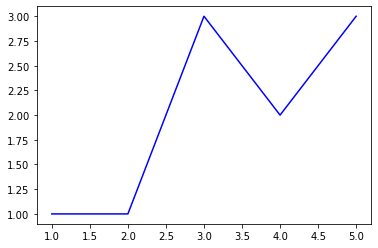

In [107]:
result = []
for i in range(5):
    p1 = NaivePlayer(1, 0, 0)
    p2 = NaivePlayer(2, 7, 7)
    g = Game(p1, p2)
    numberOfMatches = 5
    score1, score2 = g.start(numberOfMatches)
    result.append(score1)

plt.pyplot.plot(range(1,6),result,linestyle='solid',color='blue')
plt.pyplot.show()    


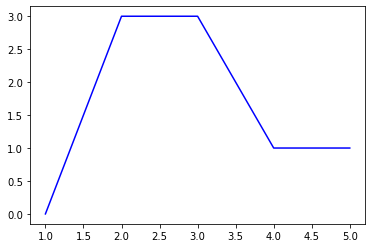

In [111]:
result = []
for i in range(5):
    p1 = MinimaxPlayer(1, 0, 0, 3)
    p2 = MinimaxPlayer(2, 7, 7, 3)
    g = Game(p1, p2)
    numberOfMatches = 5
    score1, score2 = g.start(numberOfMatches)
    result.append(score1)

plt.pyplot.plot(range(1,6),result,linestyle='solid',color='blue')
plt.pyplot.show()

'''
according to both plots: the first one that one player is naive, minimax player wins more than the second one that both 
players are minimax. when both players are minimax, they both play rational. 
the average number of wins in first plot is 2 and in the second plot is 1.6. As we said before, number of wins in the first 
plot is more than the second plot(in average)

'''

In this section you should change the game settings for different depths and plot the number of wins in fix number of matches for these depths. Also, you should let two minimax players with diffrent depths play againts eachother and report your observation.(5 points)

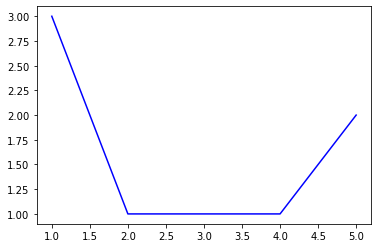

In [122]:
result = []
for i in range(1,6):
    p1 = MinimaxPlayer(1, 0, 0, i)
    p2 = NaivePlayer(2, 7, 7)
    g = Game(p1, p2)
    numberOfMatches = 3
    score1, score2 = g.start(numberOfMatches)
    result.append(score1)

plt.pyplot.plot(range(1,6),result,linestyle='solid',color='blue')
plt.pyplot.show()

"""
as the depth grows, we can see that minimax looses more. it is because greater depth means larger amount of time to make 
decision. so when depth grows, it is obvious that naive player wins. 
"""

In [121]:
p1 = MinimaxPlayer(1, 0, 0, 2)
p2 = MinimaxPlayer(2, 7, 7, 5)
g = Game(p1, p2)
numberOfMatches = 1
score1, score2 = g.start(numberOfMatches)
print(score1, score2)

"""
the second player that its depth is gretar, moves slower that the first player. i played the game for 3 rounds and in 2 rounds
the first player won. The reason is that greater depth means wiser decisions.but timing is important here. if the player
searches in deeper depths, it will take more time and meanwhile, the minimax with lower depth will gain more squares of the 
game.

if the amount of diffrence between depths is large, the minimax player that searches with the larger depth,
will have bigger posiility to loose, because it takes more time for it to make its decision.
(as you can see in the result of this game)
"""

Player 2 has exceeded the time limit
Player 1 has won

1 0


'\nthe second player that its depth is gretar, moves slower that the first player. i played the game for 3 rounds and in 2 rounds\nthe second player won. The reason is that greater depth means wiser decisions. the second player, predicts the game in \ngreater steps than the first player. so it makes better choices. \nalso the game takes more time than previous games \n'